In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [83]:
# Sample CSV data based on the given user input
data = {
    "Entity": ["Australia", "Canada", "China", "France", "Germany", "India", "Japan", "Norway", "Sweden", "United Kingdom", "United States", "World"],
    "Electricity from fossil fuels - TWh (adapted for visualization of chart elec-mix-bar)": [63.92738913747318, 19.861395495353598, 64.7240525223609, 8.422322071152088, 45.85669288218864, 78.03750190558463, 68.5291709011258, 1.4584282830913473, 1.7492185621543639, 39.91618113053256, 59.079558960238174, 60.65124215332583],
    "Electricity from nuclear - TWh (adapted for visualization of chart elec-mix-bar)": [0, 14.003780122853993, 4.595548010008891, 65.28758436910388, 1.7333940846688722, 2.4488032928502466, 7.64077315468027, 0, 29.093532099062273, 14.068622440287573, 18.24760828891164, 9.110673512206125],
    "Electricity from renewables - TWh (adapted for visualization of chart elec-mix-bar)": [36.07261086252683, 66.13482438179241, 30.680399467630203, 26.290093559744022, 52.4099130331425, 19.51369480156512, 23.83005594419394, 98.54157171690865, 69.15724933878336, 46.01519642917987, 22.67283275085019, 30.238084334468034]
}

df = pd.DataFrame(data)

# Normalize data for percentage values
df["Fossil Fuels"] = df["Electricity from fossil fuels - TWh (adapted for visualization of chart elec-mix-bar)"]
df["Nuclear"] = df["Electricity from nuclear - TWh (adapted for visualization of chart elec-mix-bar)"]
df["Renewables"] = df["Electricity from renewables - TWh (adapted for visualization of chart elec-mix-bar)"]
df_percentage = df[["Entity", "Fossil Fuels", "Nuclear", "Renewables"]]
df_percentage.set_index("Entity", inplace=True)
df_percentage = df_percentage.div(df_percentage.sum(axis=1), axis=0) * 100

In [79]:
df_percentage = pd.read_csv("elec-mix-bar.filtered/elec-mix-bar.csv")

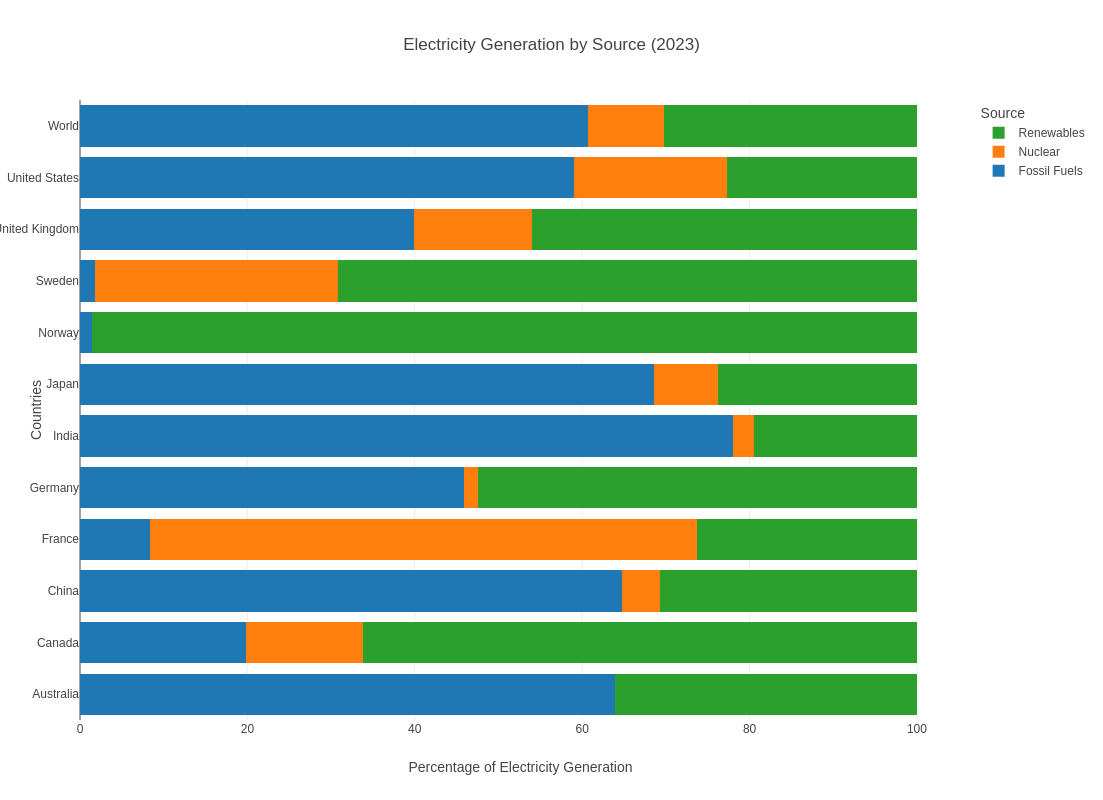

In [96]:
# Preparing the data for Plotly
plotly_data = df_percentage.reset_index()
categories = ["Fossil Fuels", "Nuclear", "Renewables"]

# Creating the stacked bar chart using Plotly
fig = go.Figure()

for category in categories:
    fig.add_trace(go.Bar(
        y=plotly_data["Entity"],
        x=plotly_data[category],
        name=category,
        orientation='h'
    ))

# Updating layout for better visualization
fig.update_layout(
    barmode='stack',
    title="Electricity Generation by Source (2023)",
    xaxis_title="Percentage of Electricity Generation",
    yaxis_title="Countries",
    legend_title="Source",
    template="ygridoff",
)

# Adjust the layout to make the visualization larger
fig.update_layout(
    width=1200,  # Set the width of the visualization
    height=800   # Set the height of the visualization
)

# Display the plot
fig.show()


In [69]:
df_share_electricity_low_carbon = pd.read_csv("share-electricity-low-carbon/share-electricity-low-carbon.csv")
# Displaying columns and their corresponding data types
print("Columns and Data Types:")
print(df_share_electricity_low_carbon.dtypes)


Columns and Data Types:
Entity                                     object
Code                                       object
Year                                        int64
Low-carbon electricity - % electricity    float64
dtype: object


In [46]:
df_share_electricity_low_carbon

,Entity,Code,Year,Low-carbon electricity - % electricity
0,ASEAN (Ember),NaN,2000,19.347086
1,ASEAN (Ember),NaN,2001,19.066320
2,ASEAN (Ember),NaN,2002,17.664303
3,ASEAN (Ember),NaN,2003,16.672487
4,ASEAN (Ember),NaN,2004,15.700016
...,...,...,...,...
7070,Zimbabwe,ZWE,2018,55.720340
7071,Zimbabwe,ZWE,2019,51.707893
7072,Zimbabwe,ZWE,2020,58.569298
7073,Zimbabwe,ZWE,2021,70.330970


In [47]:
df_share_electricity_low_carbon.shape

(7075, 4)

In [71]:
# Filter the dataset for the year 2023
df_2023 = df_share_electricity_low_carbon[df_share_electricity_low_carbon["Year"] == 2022]

# Create the world map for the year 2023
fig = px.choropleth(
    df_2023,
    locations="Code",  # ISO Alpha-3 country codes
    color="Low-carbon electricity - % electricity",
    hover_name="Entity",
    title="Share of Low-Carbon Electricity by Country (2023)",
    color_continuous_scale=px.colors.sequential.Greens,
    labels={"Low-carbon electricity - % electricity": "Low-Carbon Share (%)"}
)

# Adjust the layout to make the visualization larger
fig.update_layout(
    width=1400,  # Set the width of the visualization
    height=900   # Set the height of the visualization
)

# Display the plot
fig.show()
